# Protein-Protein Interactions in NetworkX

We will be using three important open source softwares:

    1) The Python programming language: www.python.org
    2) Jupyter notebooks: www.jupyter.org
    3) The networkX library for networks: https://networkx.github.io/
    
Please install Python3, Jupyter notebooks and networkx on your laptops and start playing. A convenient way to install these is via a package manager such as **conda**: 
- https://docs.conda.io/projects/conda/en/latest/user-guide/getting-started.html
- https://docs.conda.io/en/latest/miniconda.html

An introduction to programming in Python is provided in a separate notebook. 

# Downloading the protein-protein interaction network data

##### - The protein-protein interaction network of Yeast *saccharomyces cerevisiae* has more than $6,000$ proteins. Proteins form physical complexes of $5$-$50$ proteins and there are roughly $100$-$200$ functional communities. 

- the data can be downloaded from https://string-db.org/ : 
  -- go to "download"; 
  -- enter *saccharomyces cerevisiae* into the dropdown menu "organism name"
  -- download the file 4932.protein.links.v11.5.txt.gz

- the data are stored as a text-file. The first two columns denote two proteins which are linked. The third column is a score between 0 and 1000, which is a confidence score about the existence of that link. The prefix 4932 signifies the organism. (you should delete this prefix)   

- For example, the protein with *standard name* HST1 has a *systematic name*  YOL068C, which is what this data base records, see https://www.yeastgenome.org for details

# Reading in the data so that we can manipulate them with NetworkX

We'll need to load some specific packages to get started. If you're new to Python, the syntax for this is `import <package_name> as <alias>`. The alias is to save us from having to write out the full package name every time we call a function provided by one of those packages. If you don't already have them installed, try running `pip install <package_name>` in your terminal.

In [1]:
# one needs to import those packages which are needed; best to be done at the beginning of the program.
import networkx as nx

import numpy as np
import scipy as sp

# some basic settings for plotting figures
import matplotlib.pyplot as plt
%matplotlib inline 
font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 32}

plt.rc('font', **font)

Next, we'll need to load the data into NetworkX. The data is stored as a _weighted edgelist_, which as the name suggests, is a list of edges between nodes (proteins). In NetworkX, how we read this edgelist and use it to generate a network representation is with the method `.read_weighted_edgelist()`. In the cell below we call this function and assign the output (our Network object) the name G0.

# Note:
The version of the data downloaded from the database contains a _header_ (names for each of the columns), which can cause problems when NetworkX tries to interpret the dataset. If you download the data for yourself, **remember to delete the header first**. Unzip the text file, open it, delete the first line, and then save and continue as normal. A version with the header already removed is already stored on Ed.


In [5]:
# an older file is already stored on Ed at /course/data/4932_protein_links_v11_0.txt
G0 = nx.read_weighted_edgelist("./4932.protein.links.v11.5.txt",comments="#",nodetype=str)

# on your laptop it might be:
#G0 = nx.read_weighted_edgelist("Downloads/4932.protein.links.v11.0.txt",comments="#",nodetype=str) #Delete the header first or this might not work!
# or
#G0 = nx.read_weighted_edgelist("./../../Data/4932_protein_links_v11_0.txt",comments="#",nodetype=str) #Delete the header first or this might not work!

The graph of the PPI network is stored as a **weighted** graph in networkx. However the weights, which lie between 0 and 1000, do not signify any strength between two proteins. They are rather used to quantify the degree of confidence one has in the existence of the link/edge. These weights may be based on e.g if more experimental groups have observed evidence of the link, or if more accurate methods were used to detect the link. We therefore:
- treat the network as unweighted 
- reduce the density of the network by deleting those edges which have low confidence scores (below we use a threshold score of 500; we suggest you play with the threshold to see the effects.)

In [6]:
# delete those edges with a combined score of <= threshold_score (small confidence)
threshold_score = 500
for edge in G0.edges: 
    weight = list(G0.get_edge_data(edge[0],edge[1]).values())
    if(weight[0] <= threshold_score):
        G0.remove_edge(edge[0],edge[1])

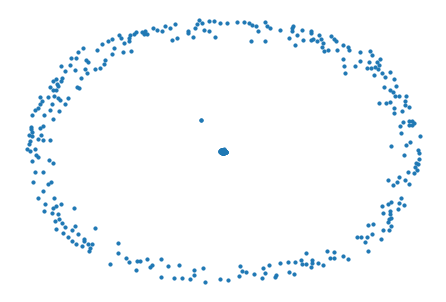

In [7]:
nx.draw(G0,node_size = 10)

# Interrogating the network

Below we illustrate the usage of the NetworkX functions that describe basic properties of a network. For more information, you can consult the NetworkX documentation on GitHub.

### 1. How many nodes are there? How many edges? What is the degree of a specific node? What are the neighbours of a specific node?

In [8]:
#number of nodes of network
print('number of nodes of G0:',G0.number_of_nodes())

#number of edges of network
print('number of edges of G0:',G0.number_of_edges())

#degree of node '4932.YOL068C'(HST1 protein)
print("degree of target node: ",G0.degree('4932.YOL068C'))

#neighbors of node '4932.YOL068C'(HST1 protein)
print(list(G0.neighbors('4932.YOL068C'))[:5])

number of nodes of G0: 6394
number of edges of G0: 210261
degree of target node:  89
['4932.YAL054C', '4932.YBL052C', '4932.YBL078C', '4932.YBL088C', '4932.YBR009C']


### 2.a Is the network connected? Maybe there is one or more group nodes(proteins) which are not linked to any other nodes outside their group?

In [9]:
print('Is the full G0 connected?',nx.connected.is_connected(G0))
print('How many connected subgraphs are there?',nx.connected.number_connected_components(G0))

Is the full G0 connected? False
How many connected subgraphs are there? 329


### 2.b If the graph is not fully connected, identify the largest connected subgraph

In [10]:
#get the largest component
largest_cc = max(nx.connected_components(G0),key=len)
G = G0.subgraph(largest_cc)

print('number of nodes of largest connected subgraph of G:',G.number_of_nodes())
print('number of edges of largest connected subgraph of G0:',G.number_of_edges())

number of nodes of largest connected subgraph of G: 6065
number of edges of largest connected subgraph of G0: 210260


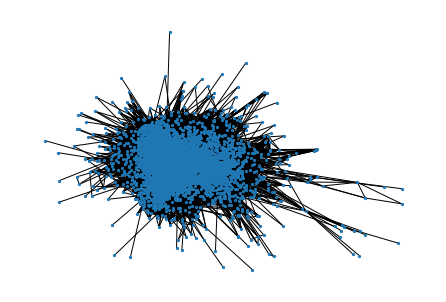

In [11]:
nx.draw(G,node_size = 5)

### 3. What is the structure of the graph? 
 **How are degrees distributed? What is the mean degree?**

In [12]:
# compute degree sequence
degS=[G.degree()[node] for node in list(G.nodes())]
degS.sort()
degS=np.array(degS)

In [13]:
mean_degree = np.average(degS)
print('Mean degree:',mean_degree)

Mean degree: 69.33553173948887


# Something to think about

There are many nodes with very large degrees. One could be tempted to think that they are important - however, many of those high-degree nodes are housekeeping proteins which are involved in almost all biochemical interactions.

(One) theme of this project: how can you reduce the complexity of the network by removing nodes which might not be important and distill a skeleton network consisting of "relevant" proteins? This is obviously not a well-defined question.

# Generate your own networks
### To get an idea about some ideas you have to analzye networks it is often helpful to test them on artificial networks. As a quick example, let's generate one now:

In [14]:
G1 = nx.empty_graph() #start with an empty graph object

G1.add_node(0) #add some nodes
G1.add_node(1)
G1.add_node(2)

G1.add_edge(0,1) #add edges between the nodes
G1.add_edge(0,2)
G1.add_edge(1,2)

#You can also add nodes and edges iteratively using loops, etc.



### We can visualise the resulting network below

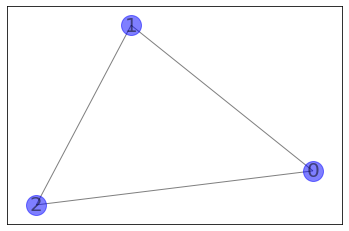

In [21]:
nx.draw_networkx(G1, node_size=400, alpha=0.5, node_color="blue", font_size='20',with_labels=True)
plt.show()

You don't always have to start with an empty network, NetworkX contains a multitude of functions and methods for graph generation and modfication. E.g, we can generate a 'scale-free' network of 100 nodes using the Barabasi-Albert algorithm by calling the built-in method `.barabasi_albert_graph()`. 

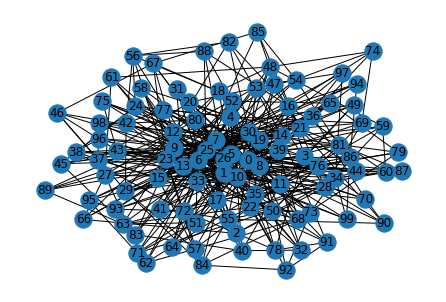

In [21]:
G_BA = nx.barabasi_albert_graph(100,5)
nx.draw(G_BA, with_labels=True)

Additionally, NetworkX features several pre-defined "famous" Networks, such as the Zachary Karate Club: https://en.wikipedia.org/wiki/Zachary%27s_karate_club

In [22]:
Gk = nx.karate_club_graph()

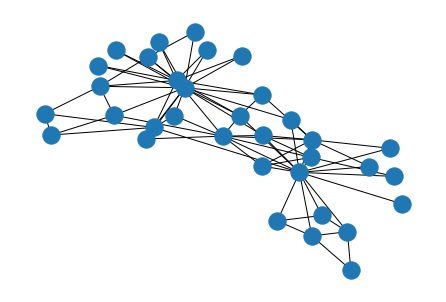

In [23]:
nx.draw(Gk)

You may have noticed by now that the graphical layout of the network could look different to your friends' plots. You should remember that how the network appears visually is irrelevant; we only care about the topology of the nodes and edges between them. Notions of 'distance' between nodes are defined in terms of paths between nodes along the edges. For instance, the following networks contain the same information as the above (it's the same network!)

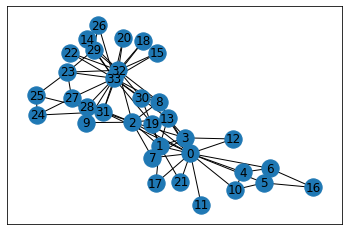

In [24]:
nx.draw_networkx(Gk)
plt.show()

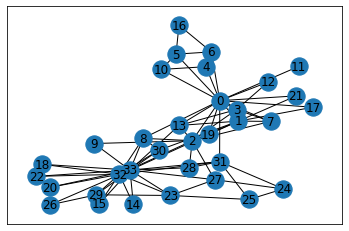

In [25]:
nx.draw_networkx(Gk,pos=nx.spring_layout(Gk))
plt.show()

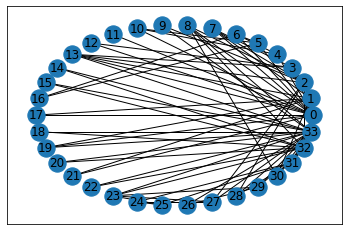

In [26]:
nx.draw_networkx(Gk,pos=nx.circular_layout(Gk))
plt.show()

## Try playing around with building your own networks!